# STARTUPS DATASET
Using the above dataset to build a Model using Linear Regression to predict the profits. 

## BUSINESS OBJECTIVE
* Maximize Profit
* Maximize Growth
* Maximize Market share
* Minimize churn rate
* Maximize Quality of Service 

## CONSTRAINTS
* High Competition
* Unrealistic Expectations 
* Low customer penetration 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | R&D Spend     | Research and Development spending of the startup.                 | Ratio    | Relevant      |
| 2        | Administration | Administrative spending of the startup  | Ratio    | Relevant      |
| 3        | Marketing Spend | Marketing and Advertising spending of the startup  | Ratio    | Relevant      |
| 4        | State | The state in which the startup is located.  | Nominal   | Relevant      |
| 5        | Profit | Profit made by the startup | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass22\50_Startups.csv")
df=df0.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[0.0, 136897.8, 0.0, 'New York', 192261.83]], dtype=object), count=array([[ 2,  1,  3, 17,  1]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13348\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

### GRAPHICAL REPRESENTATION

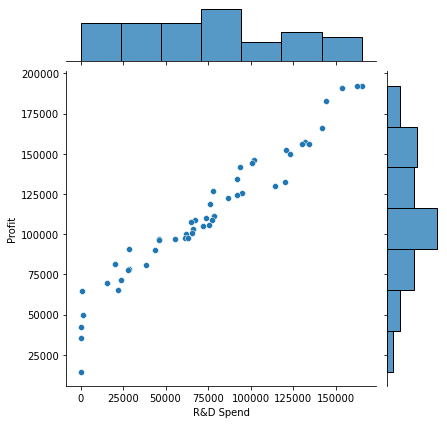

In [17]:
sns.jointplot(x=df['R&D Spend'], y=df['Profit'])

From the above joinplot it is clear that the R&D spend and profit have a very strong positive linear relation. 

From the pairplot we can observe all the scatter plots and histograms of the numerical variables of the dataset. 

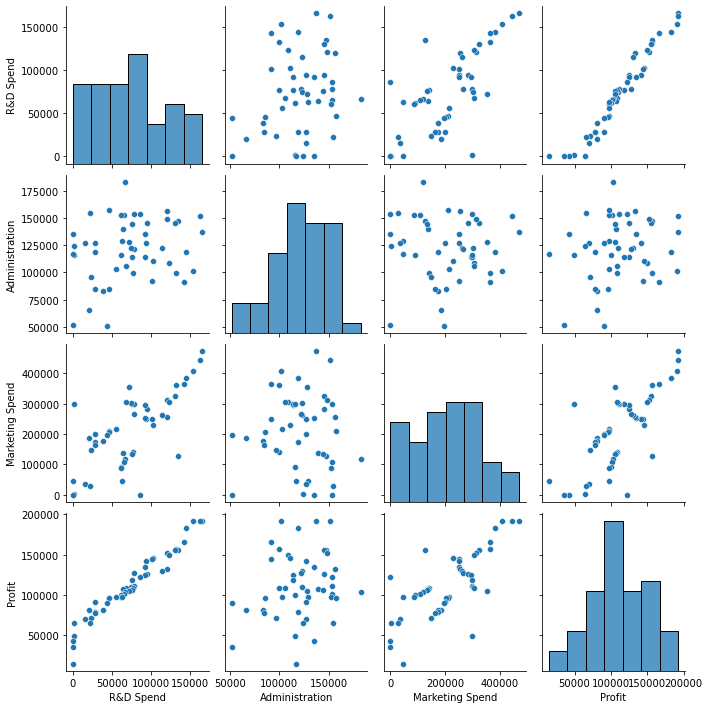

In [18]:
sns.pairplot(df.iloc[:, :])

From the countplot we can deduce that the startups are all located in only three states. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

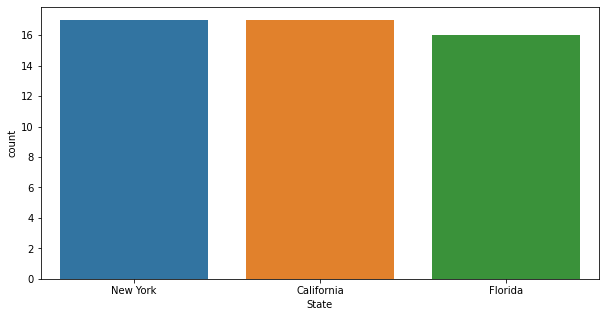

In [19]:
plt.figure(1, figsize=(10, 5))
sns.countplot(df['State'])

Here the probability plot is used to check whether the Label variable is following a normal distribution or not.From the below plot it follows a normal distribution. 

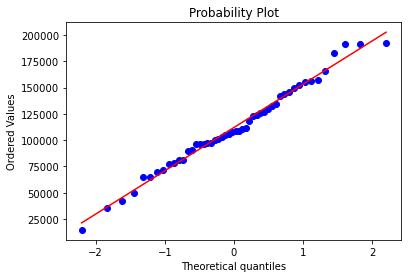

In [20]:
from scipy import stats
import pylab
stats.probplot(df['Profit'], dist = "norm", plot = pylab)
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

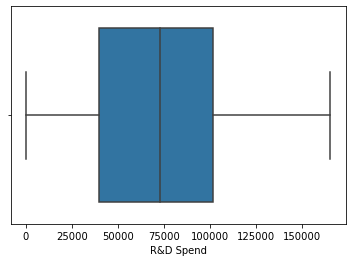

In [21]:
sns.boxplot(df["R&D Spend"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

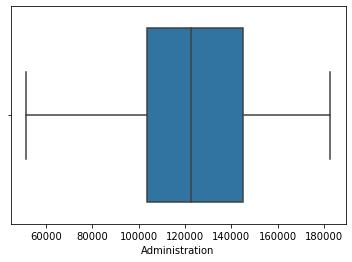

In [22]:
sns.boxplot(df['Administration'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

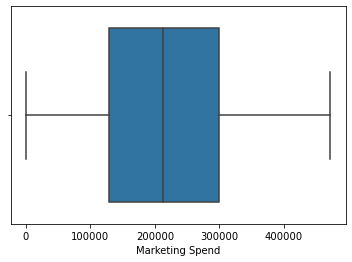

In [23]:
sns.boxplot(df['Marketing Spend'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

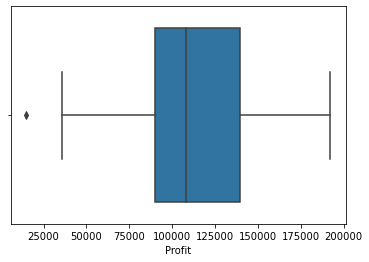

In [24]:
sns.boxplot(df['Profit'])

from the boxplots it is evident that there are no outliers in all the variables except for the depend variable which has one which is ignorable. 

__CORRELATION CHART__

<AxesSubplot:>

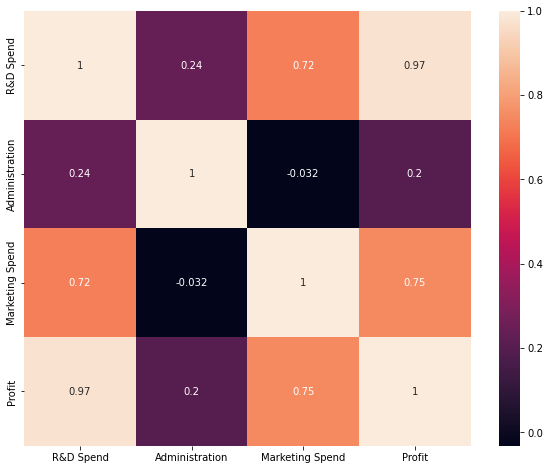

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

From the correlation chart it is very clear that R&D spend has a very strong correlation with the profit followed by the marketing spend, since the administration column has very low correlation with profit we are going to drop that column.

In [26]:
df.drop(['Administration'],axis=1,inplace=True)

Using the One Hot Encoder the create dummy variables of the categorical columns. 

In [27]:
# Loading the library required for One Hot Encoding.
from sklearn.preprocessing import OneHotEncoder

In [28]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'state' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['State']]).toarray())
encoder_df.columns=encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
df_new = df.join(encoder_df)

df_new.drop(['State'],axis=1,inplace=True)

df_new.head()

,R&D Spend,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,366168.42,166187.94,0.0,1.0,0.0


Again checking the correlation of the variables

<AxesSubplot:>

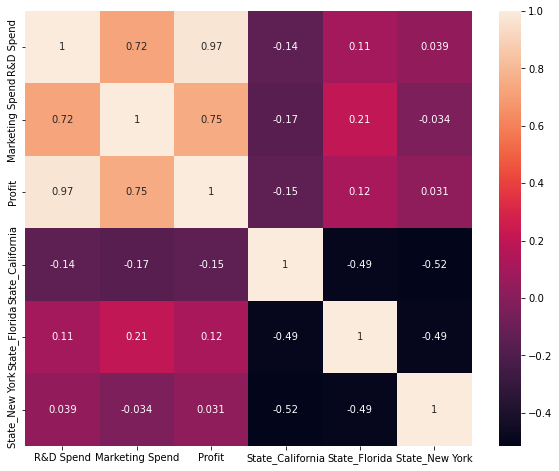

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)

On checking the correlation chart again we can see the one hot encoded variables of state also have very low correlation values so dropping them 

In [30]:
df.drop(['State'],axis=1,inplace=True)
df.rename(columns={df.columns[0]:'RS', df.columns[1]: 'MS'},inplace=True)
df.head()

,RS,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


###  MODEL BUILDING

Importing the library required for model building. 

In [31]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [32]:
model = smf.ols('Profit ~ RS + MS', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           2.16e-31
Time:                        02:49:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RS             0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The values we are concerned with are -<br>

* __R-squared/Ajusted R-squared__<br>
    R-squared value is 0.950. This shows that 95% of the variance in the dependent variable  can be explained by remaining relevant columns.<br>
* __F statistic  p value and its significance__<br>
    F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.<br>
* __The coefficients and significance (p-values)__<br>
    The coefficients of the independent variables have a very low p-value closer to zero which means they are statistically significant.<br>

From the above values we can say that the fit is significant.<br>

__Checking for multicolinearity using VIF values, so that the multicolinear variables can be removed.__<br>
Note: Assumption- VIF > 10 = colinearity<br>
calculating VIF's values of independent variables

In [33]:
rsq_RS = smf.ols('RS ~  MS', data = df).fit().rsquared  
vif_RS = 1/(1 - rsq_RS) 

In [34]:
rsq_MS = smf.ols('MS ~ RS', data = df).fit().rsquared  
vif_MS = 1/(1 - rsq_MS) 

In [35]:
# Storing vif values in a data frame
d1 = {'Variables':['RS','MS'], 'VIF':[vif_RS,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RS,2.103206
1,MS,2.103206


from the above vif values it is clear that the remaining variables have no issue of multicolinearity

__QQ PLOT__<br>
Plotting the QQ-plot to understand the distribution of the Residuals.Residuals in a statistical or machine learning model are the differences between observed and predicted values of data.

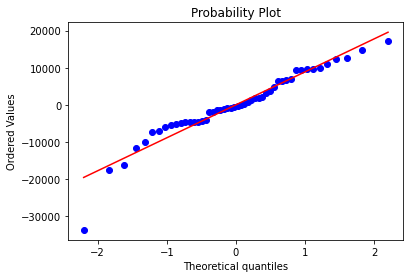

In [36]:
pred = model.predict(df)
res=model.resid
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

Normality of the residuals is an assumption of running a linear model. So, if our residuals are normal, it means that our assumption is valid and model inference should also be valid.Here the residual follows a normal distribution as seen in the above plot. 

__Residuals vs Fitted plot__

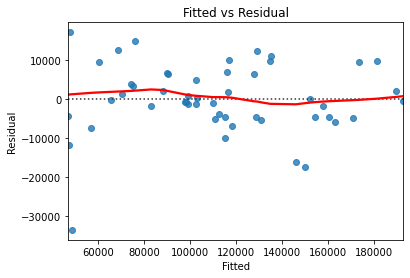

In [37]:
# 
sns.residplot(x = pred, y = df.Profit, lowess = True,line_kws=dict(color="r"))
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

* The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
* The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
* No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

Splitting the dataset to check the rmse values for both the test and train dataset which will help us to understand how well the  model works. 

In [38]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3, random_state =300) 

In [39]:
# preparing the model on train data 
model_train = smf.ols('Profit ~ RS + MS', data = df_train).fit()

In [40]:
# prediction on test data set 
test_pred = model_train.predict(df_test)

# test residual values 
test_resid = test_pred - df_test.Profit
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

9793.218475422666

In [47]:
# train_data prediction
train_pred = model_train.predict(df_train)

# train residual values 
train_resid  = train_pred - df_train.Profit
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

8654.108831847157

### CONCLUSION

This is a good regression model as r-square values are more than 0.85 and the rmse values of both train and test dataset are closer.

Marketing and R&D spend are the biggest influencers for a startup company. 